In [1]:
import sys
import copy
import numpy as np
from time import time
from IPython.display import Image

### 정렬알고리즘 종류

In [2]:
want_to_sort = []
for _ in range(100):
    n = np.random.randint(10, 500, size=1)
    temp = np.random.rand(n[0])
    temp.tolist()
    want_to_sort.append(temp)

length = 0
for i in want_to_sort:
    length += len(i)
print(length)    

time_dic = {}

25666


#### 1. 선택 정렬

주어진 배열에서 최소/최대를 찾아 맨 앞과 위치를 바꾸면서 정렬한다.  
- 장점
  - 교환 횟수가 적다
  - 구현이 간단하다
  - 데이터를 하나 씩 비교하여 정밀한 비교가 가능하다
- 단점:
  - 데이터를 하나 씩 비교하기 때문에 시간이 오래 걸린다
  - 정렬된 상태에서 새로운 데이터가 추가되면 정렬 효율이 좋지 않다

In [3]:
Image(url='Image/select_sort.gif')

In [4]:
def selection_sort(unsorted):
    n = len(unsorted)
    for i in range(n - 1):
        min_ind = i
        for j in range(i + 1, n):
            if unsorted[j] < unsorted[min_ind]:
                min_ind = j
        unsorted[min_ind], unsorted[i] = unsorted[i], unsorted[min_ind]
    return unsorted

In [5]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
a = selection_sort(a)
b = selection_sort(b)
print(a)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [6]:
selection = copy.deepcopy(want_to_sort)

In [7]:
ts = time()
for i in selection:
    selection_sort(i)
te = time()

time_dic['selection'] = te - ts

#### 2. 버블 정렬

인접한 원소와 비교하며 자리를 바꾸면서 마지막부터 정렬하는 방식.
- 장점
  - 구현이 간단하다
  - 데이터를 하나 씩 비교하기 때문에 정밀한 비교가 가능하다
- 단점
  - 데이터를 하나 씩 비교하기 때문에 비교 횟수가 많아지므로 시간이 오래 걸린다

In [8]:
Image(url='Image/bubble_sort.gif')

In [9]:
def bubble_sort(unsorted):
    n = len(unsorted)
    for i in range(n - 1, 0, -1):
        for j in range(i):
            if unsorted[j] > unsorted[j + 1]:
                unsorted[j], unsorted[j + 1] = unsorted[j + 1], unsorted[j]
    
    return unsorted

In [10]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
bubble_sort(a)
bubble_sort(b)
print(a)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [11]:
bubble = copy.deepcopy(want_to_sort)

In [12]:
ts = time()
for i in bubble:
    bubble_sort(i)
te = time()

time_dic['bubble'] = te - ts

#### 3. 삽입 정렬

버블 정렬의 비효율성을 개선하기 위함  
버블 정렬이 i번째와 i+1번째를 비교하였다면  
삽입 정렬은 i번째 원소를 정렬된 상태의 앞부분과 비교하여 적절한 위치에 삽입한다.  
버블 정렬의 비교 및 교환 횟수를 줄였다.
- 장점
  - 입력으로 들어오는 배열의 원소가 정렬되어있을수록 속도가 빠르다
  - 정렬된 값은 교환이 일어나지 않는다
- 단점
  - 삽입을 구현해야 하므로 속도가 자료구조의 영향을 많이 받는다
  - 입력으로 들어오는 배열이 역순으로 정렬된 경우 성능이 굉장히 좋지 않다.

In [13]:
Image(url='Image/insert_sort.gif')

In [14]:
def insertion_sort(unsorted):
    n = len(unsorted)
    for i in range(1, n):
        for j in range(i, 0, -1):
            if unsorted[j-1] > unsorted[j]:
                unsorted[j-1], unsorted[j] = unsorted[j], unsorted[j-1]
    
    return unsorted

In [15]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
insertion_sort(a)
insertion_sort(b)
print(a)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [16]:
insert = copy.deepcopy(want_to_sort)

In [17]:
ts = time()
for i in insert:
    insertion_sort(i)
te = time()

time_dic['insertion'] = te - ts

#### 4. 병합 정렬

작은 단위로 쪼개어 정렬한 결과를 합치면서 전체를 정렬하는 방식  
반 씩 잘라가서 두 개 씩 비교하게 된다.  
- 장점
  - 항상 일정한 시간 복잡도$\left(O\left(N\log N\right)\right)$를 가짐
  - 안정적이며 대부분의 경우에서 좋은 성능을 냄
- 단점
  - 추가 메모리 공간이 필요하다

In [18]:
Image(url='Image/merge_sort.gif')

In [19]:
# kernel이 죽음.. 
def merge_sort(unsorted):
    n = len(unsorted)
    if n <= 1:
        return unsorted
    
    mid = n // 2
    L = merge_sort(unsorted[:n])
    R = merge_sort(unsorted[n:])

    i = 0
    j = 0
    result = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            result.apend(L[i])
            i += 1
        else:
            result.append(R[j])
            j += 1
    
    result += L[i:]
    result += R[j:]
    
    return result

In [20]:
# inplace인 이유: unsorted가 바뀌어서
def merge_sort_inplace(unsorted):
    def sort(low, high):
        if high - low < 2:
            return
        mid = (low + high) // 2
        sort(low, mid)
        sort(mid, high)
        merge(low, mid, high)
    
    def merge(low, mid, high):
        temp = []
        l = low
        h = mid
        
        while l < mid and h < high:
            if unsorted[l] < unsorted[h]:
                temp.append(unsorted[l])
                l += 1
            else:
                temp.append(unsorted[h])
                h += 1
        
        while l < mid:
            temp.append(unsorted[l])
            l += 1
        while h < high:
            temp.append(unsorted[h])
            h += 1
        
        for i in range(low, high):
            unsorted[i] = temp[i - low]
    
    return sort(0, len(unsorted))

In [21]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
merge_sort_inplace(a)
merge_sort_inplace(b)
print(a)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [22]:
merge = copy.deepcopy(want_to_sort)

In [23]:
ts = time()
for i in merge:
#     merge_sort(i)
    merge_sort_inplace(i)
te = time()

time_dic['merge'] = te - ts

#### 5. 퀵 정렬

하나의 축(pivot)을 정해서 작은 값은 왼쪽에 큰 값은 오른쪽에 위치  
축의 왼쪽 오른쪽에 해당하는 원소들에 대해서도 똑같이 진행  
- 장점
  - 평균 실행 시간이 빠름
- 단점
  - 축을 어떻게 설정하느냐에 따라 성능 차이가 심함
  - 안정성이 좋지 않음

In [24]:
Image(url='Image/quick_sort.gif')

In [25]:
def quick_sort(unsorted):
    n = len(unsorted)
    if n <= 1:
        return unsorted
    
    pivot = unsorted[n // 2]
    left = []
    equal = []
    right = []
    for i in unsorted:
        if i < pivot:
            left.append(i)
        elif i > pivot:
            right.append(i)
        else:
            equal.append(i)
        
    return quick_sort(left) + equal + quick_sort(right)

In [26]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
a = quick_sort(a)
b = quick_sort(b)
print(a)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [27]:
quick = copy.deepcopy(want_to_sort)

In [28]:
ts = time()
for i in quick:
    quick_sort(i)
te = time()

time_dic['quick'] = te - ts

#### 6. 힙 정렬

힙 트리를 이용하여 정렬  
힙 트리는 완전 이진 트리임  
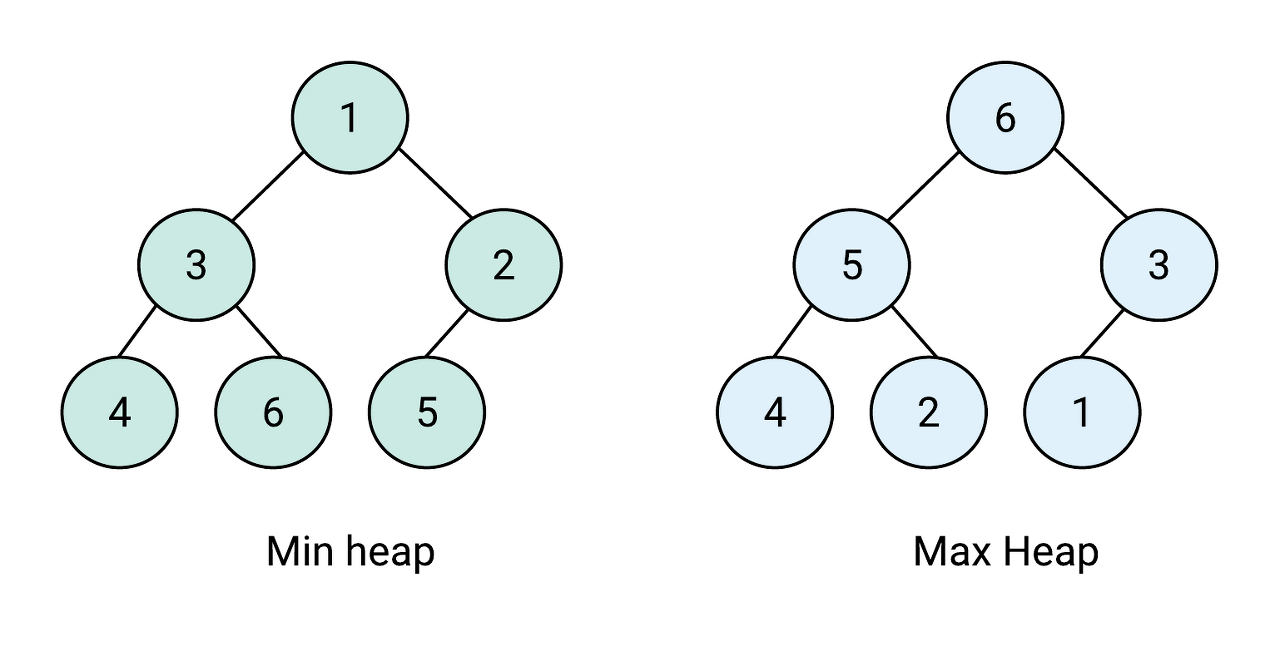
- 장점
  - 항상 같은 시간 복잡도를 갖기 때문에 성능이 준수함
- 단점
  - 같은 시간 복잡도를 가지는 다른 정렬 알고리즘에 비해 느린 편임

In [29]:
Image(url='Image/heap_sort.gif')

In [30]:
import heapq as hq
a = [1, 5, 4, 3, 2]
b = [1, 5, 4, 3, 2]
a.sort()
print(a)

hq.heapify(b)
print(b)

[1, 2, 3, 4, 5]
[1, 2, 4, 3, 5]


In [31]:
# 최대힙
def heapify(unsorted, parent, n):
    large_ind = parent
    # 자녀 노드 접근
    left = 2 * ind + 1
    right = 2 * ind + 2
    
    # 자녀 노드 중에 큰 거 갖고옴
    if left < n and unsorted[left] > unsorted[large_ind]:
        large_ind = left
    if right < n and unsorted[right] > unsorted[large_ind]:
        large_ind = right
    
    # 만약 바뀌면 swap 필요
    if large_ind != parent:
        unsorted[large_ind], unsorted[parent] = unsorted[parent], unsorted[large_ind]
        heapify(unsorted, large_ind, n)
        
def heap_sort(unsorted):
    n = len(unsorted)
    for i in range(n // 2 - 1, -1, -1):
        heapify(unsorted, i, n)
    
    for i in range(n - 1, 0, -1):
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]
        heapify(unsorted, 0, i)
    
    return unsorted

In [32]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
heap_sort(a)
heap_sort(b)
print(a)
print(b)

NameError: name 'ind' is not defined

In [ ]:
heap = copy.deepcopy(want_to_sort)

In [ ]:
ts = time()
for i in heap:
    heap_sort(i)
te = time()

time_dic['heap'] = te - ts

#### 7. 셸 정렬

삽입 정렬의 문제점 해결하기 위한 방법  
일정한 간격(gap)에 따라 분류  
이를 통해 연속적이지 않은 여러 개의 부분 배열을 생성하여 삽입 정렬로 정렬  
모든 배열이 정렬된 후 gap을 더 작게 설정하여 부분 배열의 개수를 줄임  
부분 배열의 개수가 1이 될 때까지 반복
- 장점
  - 삽입 정렬의 문제점을 해결함으로써 성능이 좋음
- 단점
  - 설정한 간격(gap)에 따라 성능의 차이가 심함

In [ ]:
Image(url='Image/shell_sort.gif')

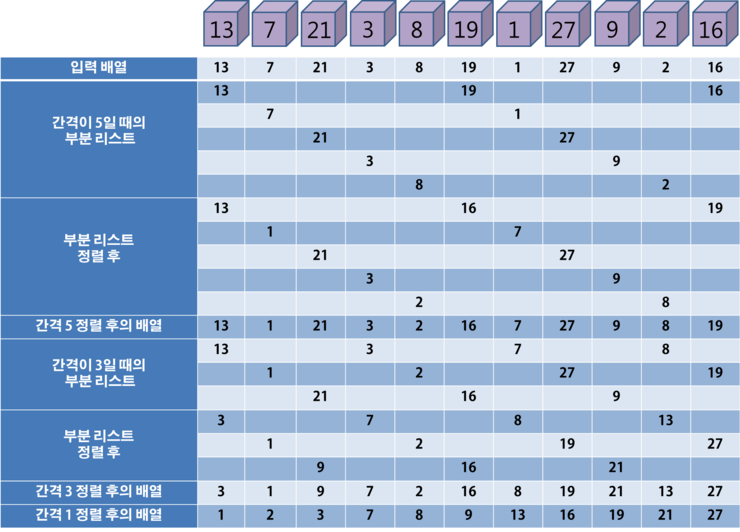

In [ ]:
def gap_insertion_sort(unsorted, start, gap):
    for i in range(start + gap, len(unsorted), gap):
        curr = unsorted[i]
        ind = i
        while ind >= gap and unsorted[ind - gap] > curr:
            unsorted[ind] = unsorted[ind - gap]
            ind -= gap
        unsorted[ind] = curr

def shell_sort(unsorted):
    sublist_len = len(unsorted) // 2
    while sublist_len > 0:
        for start in range(sublist_len):
            gap_insertion_sort(unsorted, start, sublist_len)
        sublist_len //= 2

In [ ]:
a = [5, 4, 3, 2, 1]
b = [1, 5, 2, 4, 3]
shell_sort(a)
shell_sort(b)
print(a)
print(b)

In [ ]:
shell = copy.deepcopy(want_to_sort)

In [ ]:
ts = time()
for i in shell:
    shell_sort(i)
te = time()

time_dic['shell'] = te - ts

In [ ]:
time_sort = sorted([(i, round(time_dic[i],3)) for i in time_dic], key=lambda x: x[1])
time_sort

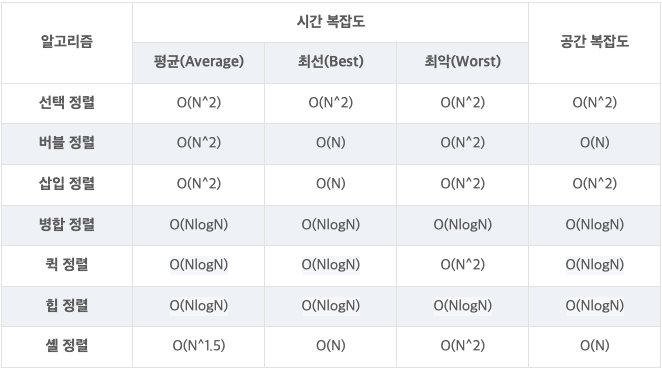

[sorting algorithm](https://www.toptal.com/developers/sorting-algorithms)

### 그래서 문제는요?

사실 위의 일곱 가지 정렬, 혹은 그 이상의 정렬을 빠삭하게 안다고 해서  
알고리즘 문제 풀 때 크게 도움이 되는 것은 아니다.

#### ex1) 두 배열의 원소 교체 (from 이코테)

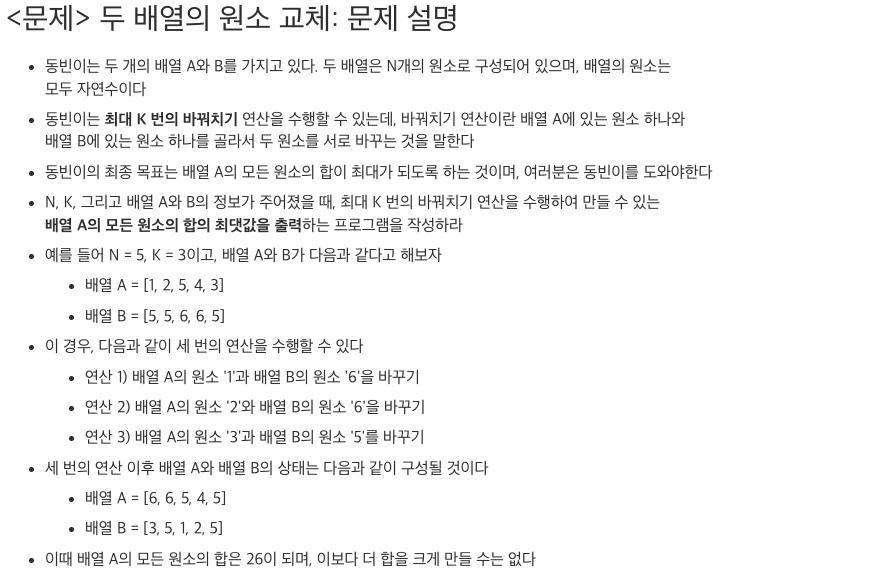

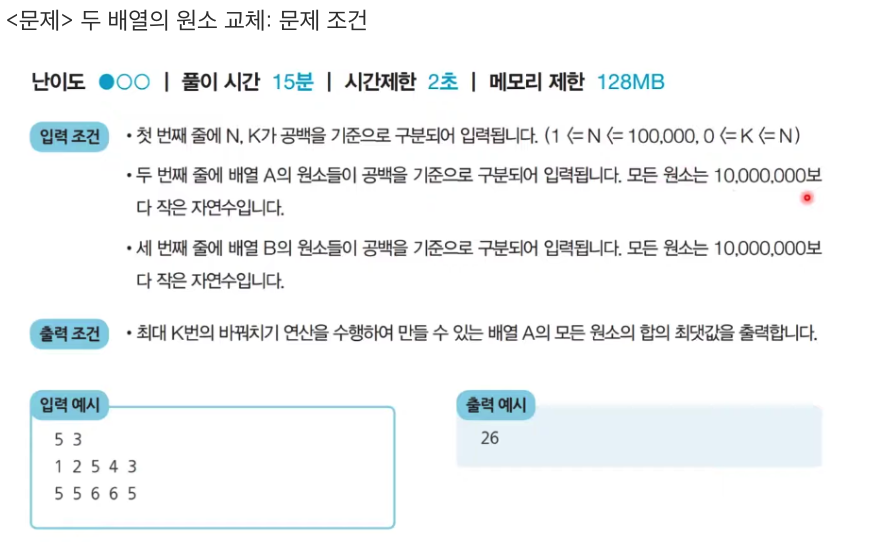

In [ ]:
# n, k = map(int, input().split())
# a = list(map(int, input().split()))
# b = list(map(int, input().split()))

n, k = 5, 3
a = [1, 2, 5, 4, 3]
b = [5, 5, 6, 6, 5]

a.sort()                 # 이 문제가
b.sort(reverse=True)     # 정렬 문제인 이유

for i in range(k):
    if a[i] < b[i]:
        a[i], b[i] = b[i], a[i]
    else:
        break

print(sum(a))

#### ex2) [보물](https://www.acmicpc.net/problem/1026) (from 백준)

<문제>  
옛날 옛적에 수학이 항상 큰 골칫거리였던 나라가 있었다.  
이 나라의 국왕 김지민은 다음과 같은 문제를 내고 큰 상금을 걸었다.  
길이가 N인 정수 배열 A와 B가 있다. 다음과 같이 함수 S를 정의하자.  
S = A[0] × B[0] + ... + A[N-1] × B[N-1]  
S의 값을 가장 작게 만들기 위해 A의 수를 재배열하자. 단, B에 있는 수는 재배열하면 안 된다.  
S의 최솟값을 출력하는 프로그램을 작성하시오.  

<입력>  
첫째 줄에 N이 주어진다. 둘째 줄에는 A에 있는 N개의 수가 순서대로 주어지고,  
셋째 줄에는 B에 있는 수가 순서대로 주어진다. N은 50보다 작거나 같은 자연수이고,  
A와 B의 각 원소는 100보다 작거나 같은 음이 아닌 정수이다.

In [ ]:
# N = int(input())
# A = list(map(int, input().split()))
# B = list(map(int, input().split()))

N = 5
A = [1, 1, 1, 6, 0]
B = [2, 7, 8, 3, 1]

sum = 0
A.sort()
for i in A:
    t = max(B)
    sum += i * t
    B.pop(B.index(t))
print(sum)

### 뭘 알아두면 좋을까요?

#### lambda

람다: 익명함수  
`def`와 함수 이름 없이 바로 정의하여 사용하는 함수  
- 장점: 코드가 간단해짐 / 메모리가 덜 사용됨

In [ ]:
plus1 = lambda x: x + 1
a = plus1(3)
print(a)

In [ ]:
multiply = lambda x, y: x * y
b = multiply(3, 4)
print(b)

In [ ]:
check_pass = lambda x: 'pass' if x >= 70 else 'fail'
check_list = [10, 75, 80, 55]
for i in check_list:
    print(f"{i}: {check_pass(i)}")

#### lambda를 이용한 list sort

In [ ]:
data_list = ['but','i','wont','hesitate','no','more','it','cannot','wait','im','yours']
data_list.sort()
print(*data_list)

In [ ]:
# list 안의 문자열을 '길이 순'으로 정렬하기
data_list.sort(key=lambda x: len(x))
for i in data_list:
    print(i)

In [ ]:
a = [(1, 2), (5, 1), (0, 1), (5, 2), (3, 0)]
b = [(1, 2), (5, 1), (0, 1), (5, 2), (3, 0)]
c = [(1, 2), (5, 1), (0, 1), (5, 2), (3, 0)]

In [ ]:
a.sort()
print(a)

In [ ]:
b.sort(key=lambda x: x[1])
print(b)

In [ ]:
c.sort(key=lambda x: (x[1], -x[0]))
print(c)

In [ ]:
# map은 함수와 iterater를 인자로 받는다 
list(map(lambda x: x + 10, [1, 2, 3]))

In [ ]:
from functools import reduce
a = [1, 2, 3, 4]
result = reduce(lambda x, y: x + y, a)
print(result)

#### dictionary sort

In [ ]:
x = {'a':5, 'b':1, 'e':3, 'c':4, 'd':2}
print(x)

In [ ]:
y = sorted(x.items(), key=lambda x: x[0])
z = sorted(x.items(), key=lambda x: x[1])
print(y)
print(z)

### 프로그래머스 문제

[42748-K번째 수](https://school.programmers.co.kr/learn/courses/30/lessons/42748)

[42746-가장 큰 수](https://school.programmers.co.kr/learn/courses/30/lessons/42746)